In [1]:
from qiskit import *
import matplotlib.pyplot as plt 
import numpy as np 


Matplotlib is building the font cache; this may take a moment.


In [3]:
#define  the oracle circuit
oracle = QuantumCircuit(2,name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [4]:
backend = Aer.get_backend('statevector_simulator')
grover_circuit = QuantumCircuit(2,2)
grover_circuit.h([0,1])
grover_circuit.append(oracle,[0,1])
grover_circuit.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [5]:
job = execute(grover_circuit,backend)
result = job.result()
sv = result.get_statevector()
np.around(sv,2)


array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [6]:
reflection = QuantumCircuit(2,name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()


In [7]:
backend = Aer.get_backend('qasm_simulator')
grover_circuit = QuantumCircuit(2,2)
grover_circuit.h([0,1])
grover_circuit.append(oracle,[0,1])
grover_circuit.append(reflection,[0,1])
grover_circuit.measure([0,1],[0,1])

grover_circuit.draw()


┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

In [8]:
job = execute(grover_circuit,backend,shots=1)
result = job.result()
result.get_counts()

{'11': 1}

In [9]:
#basic implementation
from qiskit import BasicAer
from qiskit.aqua.algorithms import Grover 
from qiskit.aqua.components.oracles import LogicalExpressionOracle
from qiskit.tools.visualization import plot_histogram


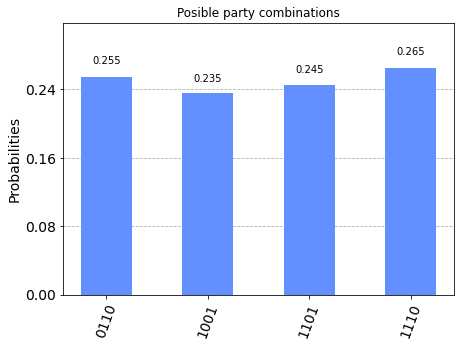

In [10]:
log_expresion  = '((Re & Ad) | (Ar & Al)) & ~(Ad & Al)'
algorithm  = Grover(LogicalExpressionOracle(log_expresion))

backend = BasicAer.get_backend('qasm_simulator')
result = algorithm.run(backend)
plot_histogram(result['measurement'],title='Posible party combinations',bar_labels=True)